<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#Esta función calculará las derivadas del ángulo y la velocidad angular.

def fun(state, t, g, L, gamma):

    theta, omega = state
    dtheta_dt = omega
    domega_dt = -((g / L) * np.sin(theta) + gamma * L * omega)
    return np.array([dtheta_dt, domega_dt])

In [3]:
#Implementaremos el método de Euler para actualizar los valores de theta y omega.

def euler_method(theta0, omega0, g, L, gamma, delta_t, t_max):
    num_steps = int(t_max / delta_t)
    theta = np.zeros(num_steps)
    omega = np.zeros(num_steps)
    t = np.zeros(num_steps)

    theta[0] = theta0
    omega[0] = omega0

    for i in range(1, num_steps):
        t[i] = i * delta_t
        theta[i] = theta[i-1] + omega[i-1] * delta_t
        omega[i] = omega[i-1] + (-((g/L) * np.sin(theta[i-1]) + gamma * L * omega[i-1])) * delta_t

    return t, theta, omega

In [4]:
#ahora implementaremos el método de Runge-Kutta de cuarto orden para simular el movimiento del péndulo.

def runge_kutta(theta0, omega0, g, L, gamma, delta_t, t_max):
    num_steps = int(t_max / delta_t)
    theta = np.zeros(num_steps)
    omega = np.zeros(num_steps)
    t = np.zeros(num_steps)

    theta[0] = theta0
    omega[0] = omega0

    for i in range(1, num_steps):
        t[i] = i * delta_t
        state = np.array([theta[i-1], omega[i-1]])

        k1 = fun(state, t[i-1], g, L, gamma)
        k2 = fun(state + 0.5 * delta_t * k1, t[i-1] + 0.5 * delta_t, g, L, gamma)
        k3 = fun(state + 0.5 * delta_t * k2, t[i-1] + 0.5 * delta_t, g, L, gamma)
        k4 = fun(state + delta_t * k3, t[i-1] + delta_t, g, L, gamma)

        state += (k1 + 2*k2 + 2*k3 + k4) * (delta_t / 6)

        theta[i] = state[0]
        omega[i] = state[1]

    return t, theta, omega

In [5]:
#Utilizaremos la función odeint de scipy para resolver la ecuación diferencial.
def odeint_solver(theta0, omega0, g, L, gamma, t):
    state0 = [theta0, omega0]
    sol = odeint(fun, state0, t, args=(g, L, gamma))
    return sol[:, 0], sol[:, 1]  # theta, omega

In [6]:
#Definiremos funciones para calcular la energía cinética, potencial y total del péndulo.

def kinetic_energy(omega, L):
    return 0.5 * (L * omega) ** 2

def potential_energy(theta, g, L):
    return g * L * (1 - np.cos(theta))

def total_energy(omega, theta, g, L):
    return kinetic_energy(omega, L) + potential_energy(theta, g, L)

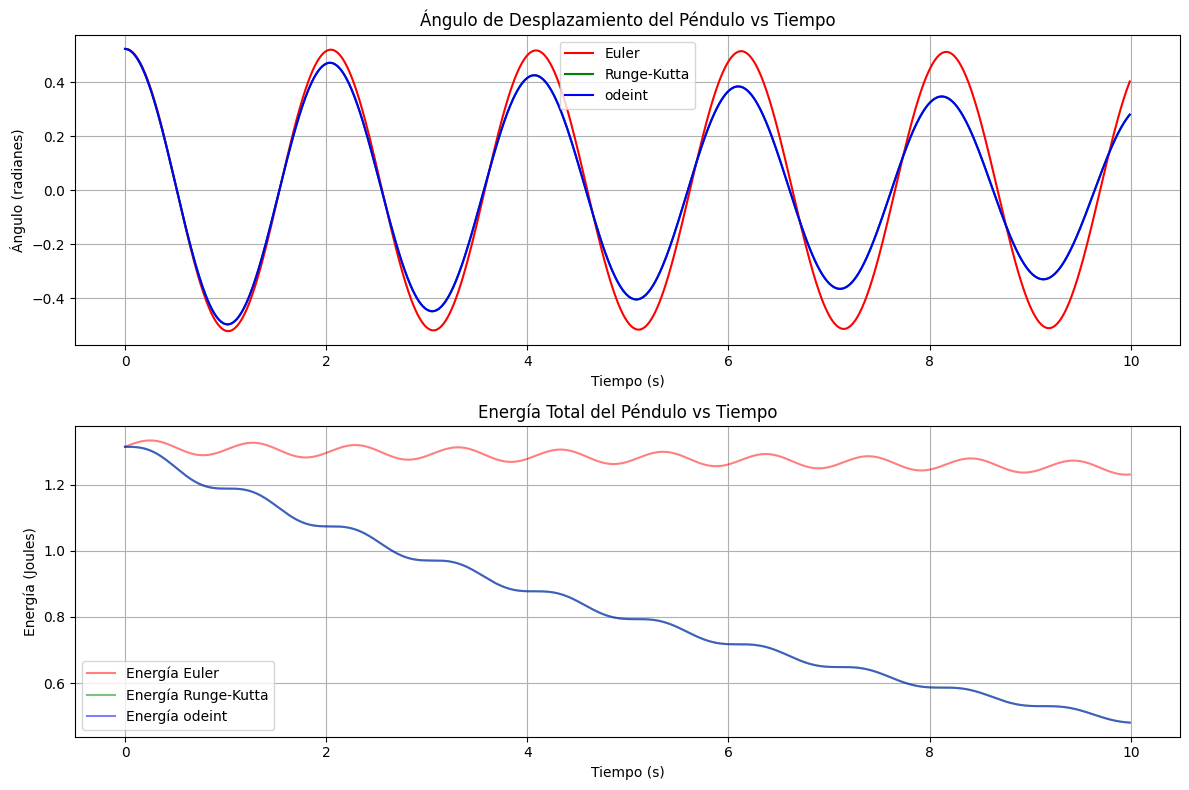

In [10]:
#Aquí es donde configuramos todos los parámetros, llamamos a las funciones, y graficamos los resultados

def main():
    # Parámetros
    g = 9.81  # m/s²
    L = 1.0   # longitud del hilo en metros
    theta0 = np.pi / 6  # ángulo inicial en radianes
    omega0 = 0.0        # velocidad angular inicial
    delta_t = 0.01      # paso de tiempo
    t_max = 10.0        # tiempo máximo de simulación
    gamma = 0.1         # coeficiente de fricción

    # Crear el array de tiempo
    t = np.arange(0, t_max, delta_t)

    # Execute methods
    t_euler, theta_euler, omega_euler = euler_method(theta0, omega0, g, L, gamma, delta_t, t_max)
    t_rk, theta_rk, omega_rk = runge_kutta(theta0, omega0, g, L, gamma, delta_t, t_max)
    theta_odeint, omega_odeint = odeint_solver(theta0, omega0, g, L, gamma, t)

    # Calcular energía
    energy_euler = total_energy(omega_euler, theta_euler, g, L)
    energy_rk = total_energy(omega_rk, theta_rk, g, L)
    energy_odeint = total_energy(omega_odeint, theta_odeint, g, L)

    # Graficar resultados
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(t_euler, theta_euler, label='Euler', color='r')
    plt.plot(t_rk, theta_rk, label='Runge-Kutta', color='g')
    plt.plot(t, theta_odeint, label='odeint', color='b')
    plt.title('Ángulo de Desplazamiento del Péndulo vs Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (radianes)')
    plt.legend()
    plt.grid()


    plt.subplot(2, 1, 2)
    plt.plot(t_euler, energy_euler, label='Energía Euler', color='r', alpha=0.5)
    plt.plot(t_rk, energy_rk, label='Energía Runge-Kutta', color='g', alpha=0.5)
    plt.plot(t, energy_odeint, label='Energía odeint', color='b', alpha=0.5)
    plt.title('Energía Total del Péndulo vs Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Energía (Joules)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Respuestas a las preguntas planteadas.

1)Impacto del paso de tiempo Δt: Un valor menor de Δt generalmente proporciona mayor precisión, pero puede aumentar el costo computacional. Un Δt muy grande puede llevar a soluciones imprecisas o inestables.

2)Ángulo inicial grande: Si el ángulo inicial es grande, la aproximación (\sin(\theta) \approx \theta) ya no es válida. En ese caso, el movimiento del péndulo se comporta de manera más no lineal.

3)Variación del movimiento con L y θ₀: Longitudes de hilo más largas generan periodos de oscilación más largos. Un ángulo inicial mayor puede resultar en oscilaciones más amplias y un movimiento más complejo.

4)Energía del sistema: La energía total del péndulo debe permanecer constante en un sistema ideal sin fricción. Sin embargo, cuando se introduce fricción (amortiguamiento), la energía total generalmente disminuye con el tiempo.

5)Diferencias entre métodos: El método de Euler puede ser menos preciso en comparación con Runge-Kutta (RK4) debido a su aproximación directa, mientras que RK4 realiza un mejor ajuste al futuro utilizando múltiples pasos intermedios.